In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['NOxy1','NOxy2','NOxy3','year', 'month', 'day']]
Y1 = df['NOx']

In [8]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [9]:
#xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=3)

In [10]:
grad_boost = GradientBoostingRegressor(n_estimators=2000,
                                      max_depth=8,
                                      max_features=0.1,
                                      min_samples_split=2,
                                      min_samples_leaf=6,
                                      learning_rate=0.02)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.02, max_depth=8, max_features=0.1,
                          min_samples_leaf=6, n_estimators=2000)

In [11]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9999212510049804

Score on test data: -2.7449584028531966

Root Mean Squared Error: 62.39050340769405

Overall model accuracy: -2.7449584028531966


In [12]:
test=data.loc['207':'259']
X=test[['NOxy1','NOxy2','NOxy3','year', 'month', 'day']]
X

,NOxy1,NOxy2,NOxy3,year,month,day
207,144.901429,180.832857,212.015714,2019,12,29
208,117.267143,397.518571,194.864286,2020,1,5
209,100.144286,219.385714,190.755714,2020,1,12
210,126.631429,148.370000,195.770000,2020,1,19
211,52.171429,157.414286,127.910000,2020,1,26
212,65.417143,77.248571,156.391429,2020,2,2
213,80.275714,129.428571,268.622857,2020,2,9
214,98.288571,86.665714,129.678571,2020,2,16
215,96.087143,173.738571,120.168571,2020,2,23
216,117.698571,137.625714,108.778571,2020,3,1


In [13]:
predict=grad_boost.predict(X)

In [14]:
predict

array([205.39912922, 170.23823914, 121.2549347 , 147.95515116,
       155.79695821, 105.07912608, 105.32755501, 110.94347467,
       121.07283795, 132.17141149,  97.6928474 ,  82.29335442,
        84.52497166, 109.06197291, 124.82099295,  83.53615862,
        80.18462406, 103.66694135,  69.06653002, 103.55182472,
        71.98309898, 110.12536656,  91.65748111,  71.77391704,
        41.61199174,  51.43593108,  63.12972059,  31.79313923,
        37.88359001,  26.29630824,  33.38249882,  24.56942353,
        21.71054953,  15.43996517,  20.83310523,  40.23044472,
        21.11555025,  22.27398104,  22.16178649,  87.36325098,
       122.18089767, 108.39778821, 136.03794441, 176.94413916,
       156.67525331, 171.12399706, 149.87607804, 152.30565722,
       180.10291605, 171.67603753, 186.64944208, 144.55875785,
       130.04416044])

In [15]:
dates=data.loc['207':'259','From Date']

In [16]:
X['From Date']=dates.values

In [17]:
X.columns

Index(['NOxy1', 'NOxy2', 'NOxy3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [18]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [19]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [20]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [21]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

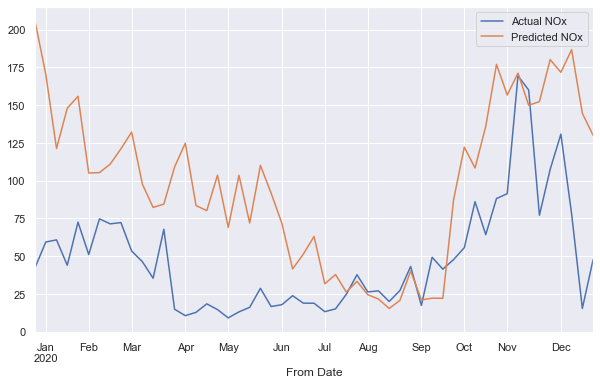

In [22]:
test['NOx'].plot(legend=True, label='Actual NOx', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NOx')

In [23]:
np.sqrt(mean_squared_error(test['NOx'],X['pred']))

65.15322752058167

In [24]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 44.522618210232395
MSE: 3892.5749154654827
RMSE: 62.39050340769405
R-Squared: -2.7449584028531966


In [25]:
mae = metrics.mean_absolute_error(test['NOx'],X['pred'])
mse = metrics.mean_squared_error(test['NOx'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NOx'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 53.22341719569695
MSE: 4244.943056348679
RMSE: 65.15322752058167
R-Squared: -2.256893646174205


In [26]:
import pickle
filename = 'NOx_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [27]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

-2.7449584028531966


# 3rd plot

In [28]:
testcase = pd.DataFrame()

In [29]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [30]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [31]:
testcase

,test,pred,Corrected
155,144.901429,145.032114,82.641610
156,117.267143,175.452551,113.062048
157,100.144286,167.554749,105.164246
158,126.631429,135.554627,73.164124
159,52.171429,146.403462,84.012958
160,65.417143,133.412842,71.022338
161,80.275714,112.769361,50.378857
162,98.288571,106.547895,44.157392
163,96.087143,134.417769,72.027265
164,117.698571,146.100004,83.709501


In [32]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [33]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

-0.013496091848147262

In [34]:
test2020=pd.DataFrame()

In [35]:
test2020['test']=test['NOx']
test2020['pred']=X['pred']

In [36]:
test2020.index=test.index

In [37]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

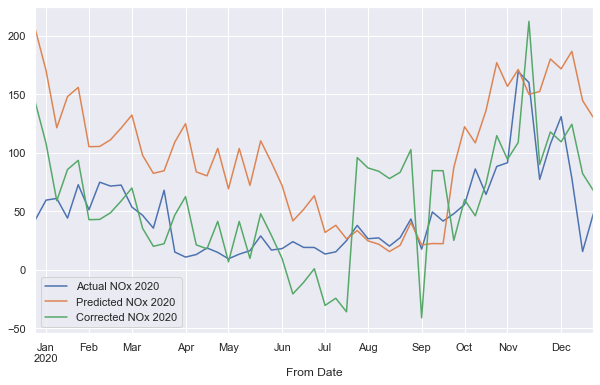

In [38]:
test2020['test'].plot(legend=True, label='Actual NOx 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NOx 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NOx 2020')

In [39]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.3766527770139735